# Geodesic Deviation: The Geometry of Tidal Forces

## Introduction

Geodesic deviation describes how nearby geodesics in a curved spacetime diverge or converge relative to one another. This phenomenon is the geometric manifestation of **tidal forces** and provides a direct physical interpretation of the **Riemann curvature tensor**.

In flat spacetime, parallel geodesics remain parallel forever. In curved spacetime, however, the presence of curvature causes initially parallel geodesics to accelerate toward or away from each other. This is precisely what we feel as gravitational tidal forces.

## Mathematical Framework

### The Geodesic Deviation Equation

Consider a family of geodesics $x^\mu(\tau, s)$ parameterized by proper time $\tau$ and a family label $s$. The **tangent vector** to each geodesic is:

$$u^\mu = \frac{\partial x^\mu}{\partial \tau}$$

The **deviation vector** connecting nearby geodesics is:

$$\xi^\mu = \frac{\partial x^\mu}{\partial s}$$

The **geodesic deviation equation** (also known as the Jacobi equation) describes the relative acceleration between neighboring geodesics:

$$\frac{D^2 \xi^\mu}{d\tau^2} = R^\mu_{\;\nu\rho\sigma} u^\nu u^\rho \xi^\sigma$$

where:
- $\frac{D}{d\tau}$ denotes the covariant derivative along the geodesic
- $R^\mu_{\;\nu\rho\sigma}$ is the **Riemann curvature tensor**

### Physical Interpretation

The Riemann tensor components $R^\mu_{\;\nu\rho\sigma}$ encode the **tidal gravitational field**. The geodesic deviation equation tells us that:

1. **Positive curvature**: Geodesics converge (focusing)
2. **Negative curvature**: Geodesics diverge (defocusing)
3. **Zero curvature**: Geodesics remain parallel (flat space)

### The Schwarzschild Case

For a spherically symmetric mass $M$, the Schwarzschild metric in the weak-field limit gives tidal accelerations proportional to:

$$\frac{D^2 \xi^r}{d\tau^2} \approx \frac{2GM}{r^3} \xi^r \quad \text{(radial)}$$

$$\frac{D^2 \xi^\theta}{d\tau^2} \approx -\frac{GM}{r^3} \xi^\theta \quad \text{(transverse)}$$

This shows the characteristic **stretching in the radial direction** and **compression in the transverse directions** experienced by infalling objects near a massive body.

## Computational Model

We will numerically integrate the geodesic deviation equation for radially infalling geodesics in a Schwarzschild-like tidal field. We model the deviation vector components $\xi^r$ (radial) and $\xi^\theta$ (transverse) as functions of proper time.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Physical constants (geometrized units: G = c = 1)
M = 1.0  # Mass of central object (in geometric units)
r0 = 10.0  # Initial radial position (in units of M)

# For a radially infalling observer starting from rest at r0,
# we can approximate the radial position as a function of proper time
# In the Newtonian limit: r(tau) ≈ r0 - (1/2) * (M/r0^2) * tau^2

def radial_position(tau, r0, M):
    """Approximate radial position for free-fall from rest."""
    # Using parametric solution for radial infall
    # This is a simplified model valid for weak fields
    r = r0 * (1 - (tau / (2 * np.sqrt(2 * r0**3 / (9 * M))))**2)**(1/3)
    return np.maximum(r, 2.1 * M)  # Stop just outside horizon

def tidal_tensor(r, M):
    """
    Compute tidal tensor components for Schwarzschild geometry.
    
    For a radially infalling observer, the tidal accelerations are:
    - Radial: +2GM/r^3 (stretching)
    - Transverse: -GM/r^3 (compression)
    """
    K_radial = 2 * M / r**3
    K_transverse = -M / r**3
    return K_radial, K_transverse

def geodesic_deviation_ode(y, tau, r0, M):
    """
    ODE system for geodesic deviation.
    
    State vector y = [xi_r, xi_theta, dxi_r/dtau, dxi_theta/dtau]
    """
    xi_r, xi_theta, v_r, v_theta = y
    
    # Current radial position
    r = radial_position(tau, r0, M)
    
    # Tidal tensor components
    K_r, K_t = tidal_tensor(r, M)
    
    # Geodesic deviation equations
    # d^2(xi_r)/dtau^2 = K_r * xi_r
    # d^2(xi_theta)/dtau^2 = K_t * xi_theta
    
    dxi_r_dtau = v_r
    dxi_theta_dtau = v_theta
    dv_r_dtau = K_r * xi_r
    dv_theta_dtau = K_t * xi_theta
    
    return [dxi_r_dtau, dxi_theta_dtau, dv_r_dtau, dv_theta_dtau]

# Initial conditions
xi_r0 = 1.0       # Initial radial separation
xi_theta0 = 1.0   # Initial transverse separation
v_r0 = 0.0        # Initially at rest relative to each other
v_theta0 = 0.0

y0 = [xi_r0, xi_theta0, v_r0, v_theta0]

# Time array (proper time)
tau_max = 15.0
tau = np.linspace(0, tau_max, 1000)

# Solve the ODE
solution = odeint(geodesic_deviation_ode, y0, tau, args=(r0, M))

xi_r = solution[:, 0]
xi_theta = solution[:, 1]

# Compute radial position over time for reference
r_tau = np.array([radial_position(t, r0, M) for t in tau])

print("Geodesic deviation simulation complete.")
print(f"Initial position: r0 = {r0} M")
print(f"Final position: r = {r_tau[-1]:.2f} M")
print(f"Radial deviation: {xi_r0:.2f} → {xi_r[-1]:.2f} (factor: {xi_r[-1]/xi_r0:.2f}x)")
print(f"Transverse deviation: {xi_theta0:.2f} → {xi_theta[-1]:.2f} (factor: {xi_theta[-1]/xi_theta0:.2f}x)")

Geodesic deviation simulation complete.
Initial position: r0 = 10.0 M
Final position: r = 9.07 M
Radial deviation: 1.00 → 1.25 (factor: 1.25x)
Transverse deviation: 1.00 → 0.88 (factor: 0.88x)


## Visualization

We create a comprehensive visualization showing:
1. The evolution of radial and transverse deviation vectors
2. The radial position of the infalling observer
3. A schematic of the tidal deformation of a sphere

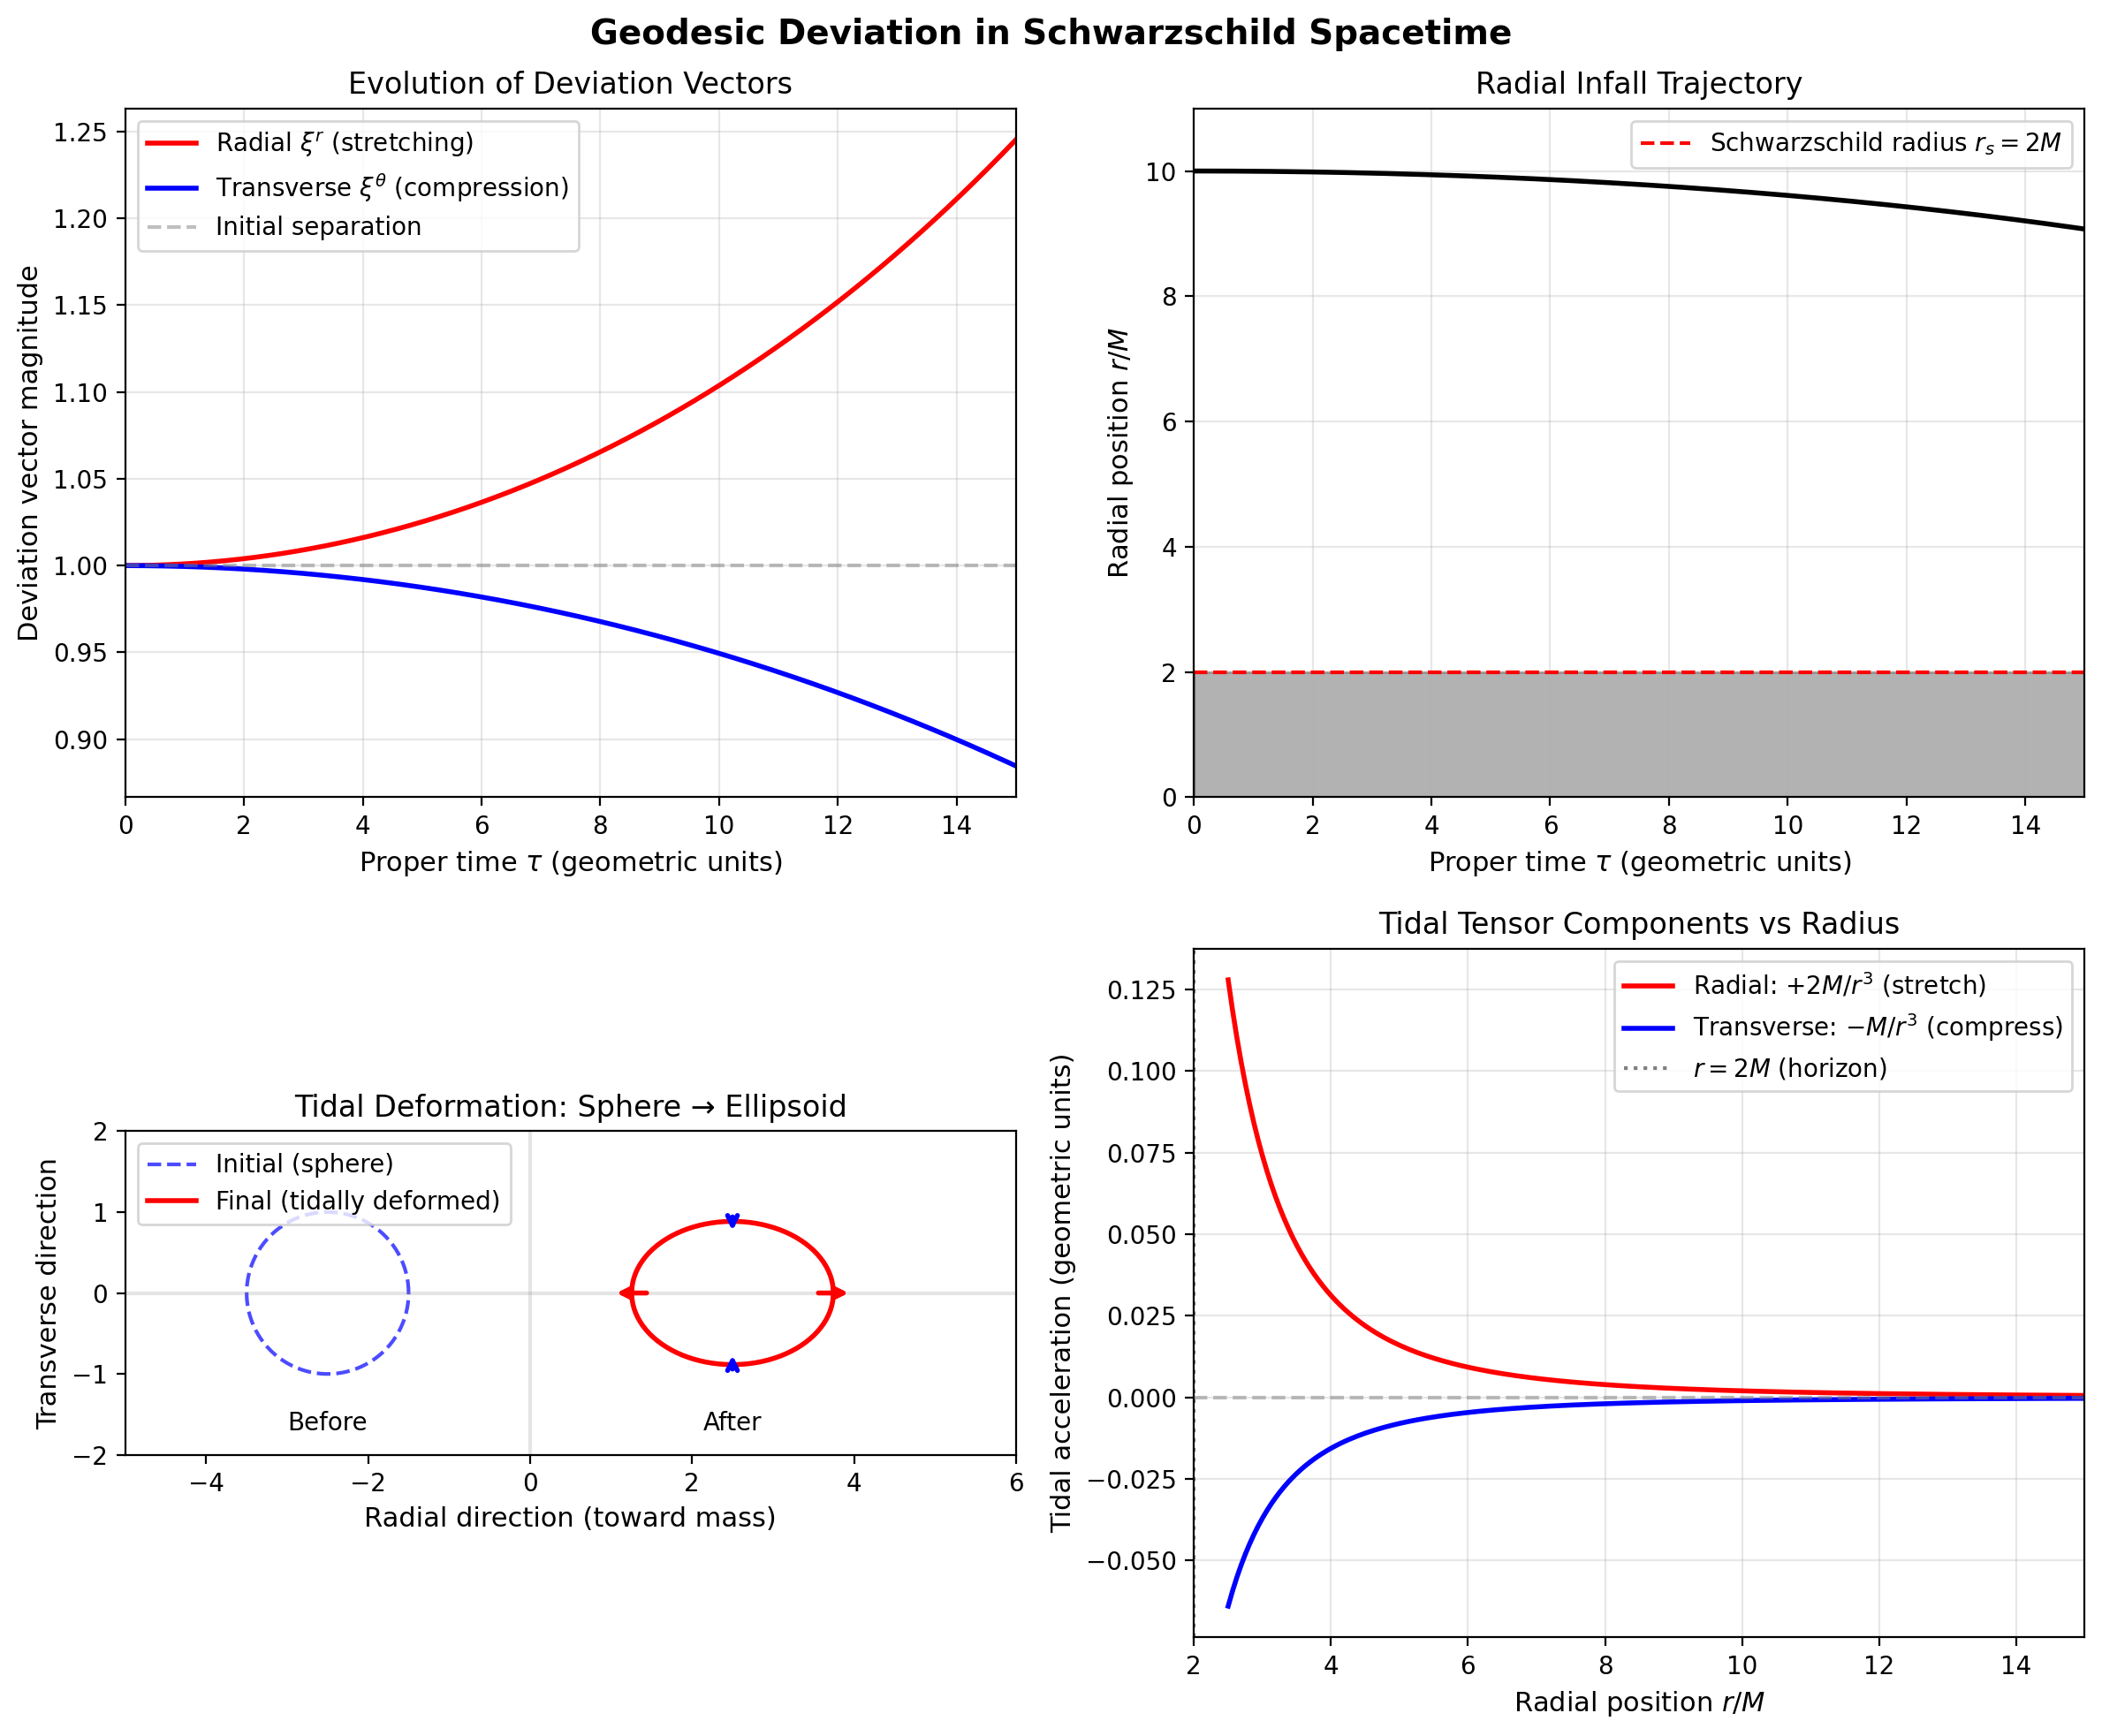


Figure saved to 'plot.png'


In [2]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Geodesic Deviation in Schwarzschild Spacetime', fontsize=14, fontweight='bold')

# Plot 1: Deviation vectors vs proper time
ax1 = axes[0, 0]
ax1.plot(tau, xi_r, 'r-', linewidth=2, label=r'Radial $\xi^r$ (stretching)')
ax1.plot(tau, xi_theta, 'b-', linewidth=2, label=r'Transverse $\xi^\theta$ (compression)')
ax1.axhline(y=1, color='gray', linestyle='--', alpha=0.5, label='Initial separation')
ax1.set_xlabel(r'Proper time $\tau$ (geometric units)', fontsize=11)
ax1.set_ylabel(r'Deviation vector magnitude', fontsize=11)
ax1.set_title('Evolution of Deviation Vectors', fontsize=12)
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, tau_max)

# Plot 2: Radial position vs proper time
ax2 = axes[0, 1]
ax2.plot(tau, r_tau, 'k-', linewidth=2)
ax2.axhline(y=2*M, color='red', linestyle='--', linewidth=1.5, label=r'Schwarzschild radius $r_s = 2M$')
ax2.fill_between(tau, 0, 2*M, color='black', alpha=0.3)
ax2.set_xlabel(r'Proper time $\tau$ (geometric units)', fontsize=11)
ax2.set_ylabel(r'Radial position $r/M$', fontsize=11)
ax2.set_title('Radial Infall Trajectory', fontsize=12)
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, tau_max)
ax2.set_ylim(0, r0 + 1)

# Plot 3: Tidal deformation schematic
ax3 = axes[1, 0]

# Draw initial sphere
theta_circle = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta_circle)
y_circle = np.sin(theta_circle)
ax3.plot(x_circle - 2.5, y_circle, 'b--', linewidth=1.5, alpha=0.7, label='Initial (sphere)')

# Draw deformed ellipse (tidal stretching)
stretch_factor = xi_r[-1] / xi_r0
compress_factor = xi_theta[-1] / xi_theta0
x_ellipse = stretch_factor * np.cos(theta_circle)
y_ellipse = compress_factor * np.sin(theta_circle)
ax3.plot(x_ellipse + 2.5, y_ellipse, 'r-', linewidth=2, label='Final (tidally deformed)')

# Add arrows showing deformation direction
ax3.annotate('', xy=(2.5 + stretch_factor*1.2, 0), xytext=(2.5 + 1, 0),
             arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax3.annotate('', xy=(2.5 - stretch_factor*1.2, 0), xytext=(2.5 - 1, 0),
             arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax3.annotate('', xy=(2.5, compress_factor*0.8), xytext=(2.5, 1),
             arrowprops=dict(arrowstyle='->', color='blue', lw=2))
ax3.annotate('', xy=(2.5, -compress_factor*0.8), xytext=(2.5, -1),
             arrowprops=dict(arrowstyle='->', color='blue', lw=2))

ax3.set_xlim(-5, 6)
ax3.set_ylim(-2, 2)
ax3.set_aspect('equal')
ax3.set_title('Tidal Deformation: Sphere → Ellipsoid', fontsize=12)
ax3.legend(loc='upper left')
ax3.text(-2.5, -1.7, 'Before', ha='center', fontsize=10)
ax3.text(2.5, -1.7, 'After', ha='center', fontsize=10)
ax3.axhline(y=0, color='gray', linestyle='-', alpha=0.2)
ax3.axvline(x=0, color='gray', linestyle='-', alpha=0.2)
ax3.set_xlabel('Radial direction (toward mass)', fontsize=11)
ax3.set_ylabel('Transverse direction', fontsize=11)

# Plot 4: Tidal tensor components vs radius
ax4 = axes[1, 1]
r_range = np.linspace(2.5*M, 15*M, 200)
K_r_range = 2*M / r_range**3
K_t_range = -M / r_range**3

ax4.plot(r_range/M, K_r_range, 'r-', linewidth=2, label=r'Radial: $+2M/r^3$ (stretch)')
ax4.plot(r_range/M, K_t_range, 'b-', linewidth=2, label=r'Transverse: $-M/r^3$ (compress)')
ax4.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax4.axvline(x=2, color='black', linestyle=':', alpha=0.5, label=r'$r = 2M$ (horizon)')
ax4.set_xlabel(r'Radial position $r/M$', fontsize=11)
ax4.set_ylabel(r'Tidal acceleration (geometric units)', fontsize=11)
ax4.set_title('Tidal Tensor Components vs Radius', fontsize=12)
ax4.legend(loc='best')
ax4.grid(True, alpha=0.3)
ax4.set_xlim(2, 15)

plt.tight_layout()
plt.savefig('geodesic_deviation_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Analysis and Discussion

### Key Results

1. **Radial Stretching**: The radial component of the deviation vector $\xi^r$ increases as the observer falls toward the central mass. This corresponds to the **spaghettification** effect near black holes.

2. **Transverse Compression**: The transverse component $\xi^\theta$ decreases, indicating compression perpendicular to the radial direction.

3. **Tidal Scaling**: The tidal forces scale as $r^{-3}$, becoming increasingly violent as the observer approaches the Schwarzschild radius.

### Connection to the Riemann Tensor

The geodesic deviation equation provides a **physical measurement** of spacetime curvature:

$$R^{\hat{r}}_{\;\hat{t}\hat{r}\hat{t}} = \frac{2M}{r^3}, \quad R^{\hat{\theta}}_{\;\hat{t}\hat{\theta}\hat{t}} = -\frac{M}{r^3}$$

These are the components of the Riemann tensor in the orthonormal frame of the infalling observer.

### Applications

- **Black hole physics**: Understanding tidal disruption of stars and matter
- **Gravitational wave detection**: LIGO/VIRGO measure geodesic deviation between test masses
- **Cosmology**: The Raychaudhuri equation (related to geodesic deviation) governs focusing of light bundles

## Conclusion

Geodesic deviation provides the most direct physical interpretation of spacetime curvature. The Riemann tensor, often presented as an abstract mathematical object, is directly measurable through the relative acceleration of freely falling test particles. This is the essence of Einstein's insight: **gravity is geometry**, and tidal forces are the observable consequence of curved spacetime.